In [1]:
%matplotlib inline

import numpy as np
import timeit
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200 #Simplement pour avoir une meilleure résolution

# Partie 1

## Méthodes

In [2]:
# Méthode d'Euleur
def euler_solver(f, x0, tmax, h, intervalle):
    """
    résout un système d'équations différentielles à l'aide de la méthode d'Euler
    :param f: fonction définissant le système. f(x, t) retourne un vecteur de dérivées
    :param x0: point initial (vecteur)
    :param tmax: durée de la simulation
    :param h: pas temporel
    :param intervalle : intervalle d'écriture dans la solution
    :return: un tableau numpy de la solution
    """

    grille = np.arange(0, tmax+0.000001, h)
    I_inter = int(np.ceil(intervalle/h)) # nombre de pas entre chaque enregistrement
    N = 1+int(tmax/(h*I_inter)) # nombres de temps dans la solution
    sol = np.empty((N, len(x0)))

    x = x0
    count = 0
    I = 0
    for t in grille:
        if count%I_inter == 0 :
            sol[I, :] = x
            I += 1
        x += f(x, t)*h
        count += 1

    return sol

In [3]:
# Méthode prédicteur-correcteur
def predicteur_correcteur(f, x0, tmax, h, intervalle):
    """
    résout un système d'équations différentielles à l'aide de la méthode de prédicteur-correcteur
    :param f: fonction définissant le système. f(x, t) retourne un vecteur de dérivées
    :param x0: point initial (vecteur)
    :param tmax: durée de la simulation
    :param h: pas temporel
    :param intervalle : intervalle d'écriture dans la solution
    :return: un tableau numpy de la solution
    """

    grille = np.arange(0, tmax+0.000001, h)
    I_inter = int(np.ceil(intervalle/h)) # nombre de pas entre chaque enregistrement
    N = 1+int(tmax/(h*I_inter)) # nombres de temps dans la solution
    sol = np.empty((N, len(x0)))

    x = x0
    count = 0
    I = 0
    for t in grille:
        if count%I_inter == 0 :
            sol[I, :] = x
            I += 1
            
        x_pred = x + f(x,t)*h
        x += f(0.5*(x+x_pred), t)*h
        count += 1

    return sol

In [4]:
A = 0.00
def force_radiale(r): # cette fonction retourne la grandeur de la force
    return 1.0/(r*r) + A/(r**4)

def DX(x, t): # cette fonction retourne un vecteur de dérivées de taille 4
    R = np.sqrt(x[0]*x[0]+x[1]*x[1])
    f = force_radiale(R)
    return np.array([x[2], x[3], -f*x[0]/R, -f*x[1]/R])

## Calculs

In [5]:
deltaT = 30.0 # temps de simulation
x0 = [1.0, 0.0, 0.0, 0.6] # conditions initiales

In [6]:
# Méthode prédicteur-correcteur
t_calcul = timeit.default_timer()

Y = predicteur_correcteur(DX, x0, deltaT, 0.0001, 0.01)

t_calcul = timeit.default_timer() - t_calcul

print('(Prédicteur-correcteur) temps de calcul: ', t_calcul)

(Prédicteur-correcteur) temps de calcul:  8.317113190889359


In [7]:
# Méthode d'Euler
t_calcul = timeit.default_timer()

X = euler_solver(DX, x0, deltaT, 0.0001, 0.01)

t_calcul = timeit.default_timer() - t_calcul

print('(Euler) temps de calcul: ', t_calcul)

(Euler) temps de calcul:  4.000071946531534


In [8]:
# Méthode odeint
t = np.arange(0, deltaT, 0.02)

t_calcul = timeit.default_timer()

y = odeint(DX, x0, t) # solution du système d'équations différentielles

t_calcul = timeit.default_timer() - t_calcul

print('(odeint) temps de calcul: ', t_calcul)

(odeint) temps de calcul:  0.037779029458761215


## Graphiques

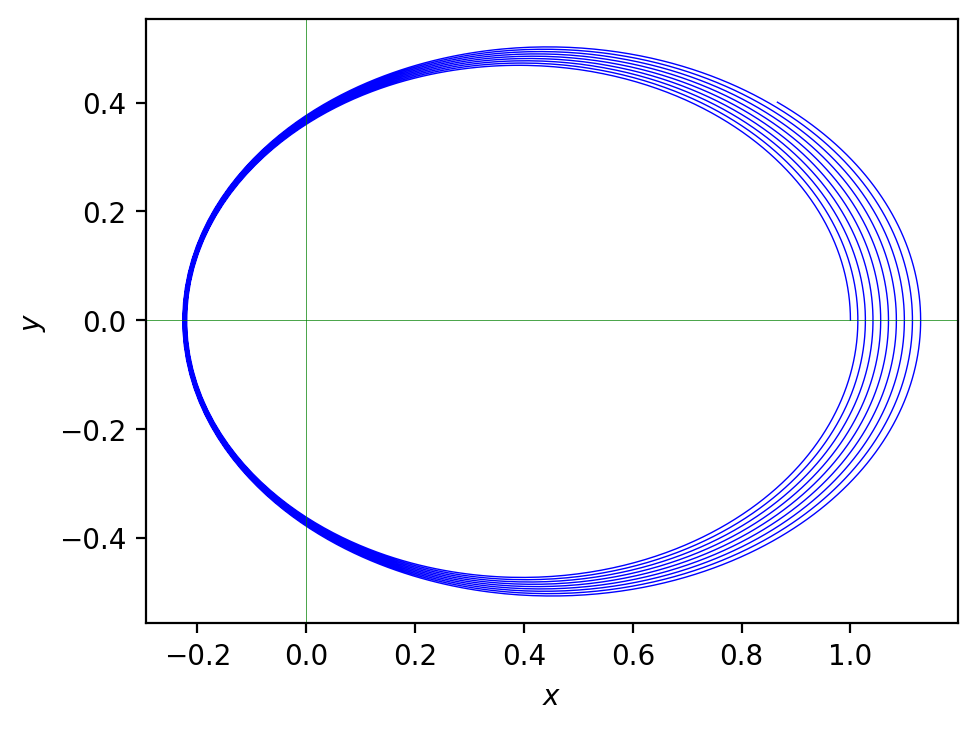

In [9]:
# Méthode d'Euler-------------------------------------------------------------------------------------------------------
plt.axes().set_aspect(1)
#plt.subplot(311, aspect='equal')
plt.plot(X[:,0], X[:,1], 'b-', lw=0.5)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.axhline(0, color='green', lw=0.25) # on trace l'axe des x
plt.axvline(0, color='green', lw=0.25) # on trace l'axe des y

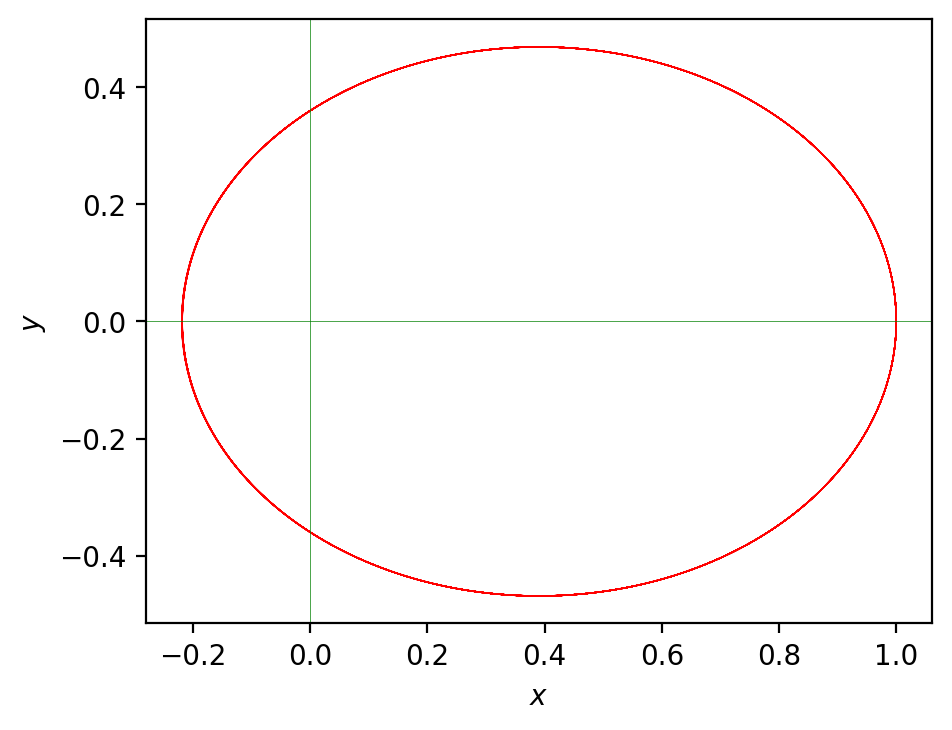

In [10]:
# Méthode odeint--------------------------------------------------------------------------------------------------------
plt.axes().set_aspect(1)
#plt.subplot(312, aspect='equal')
plt.plot(y[:,0],y[:,1],'r-', lw=0.5)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.axhline(0, color='green', lw=0.25) # on trace l'axe des x
plt.axvline(0, color='green', lw=0.25) # on trace l'axe des y

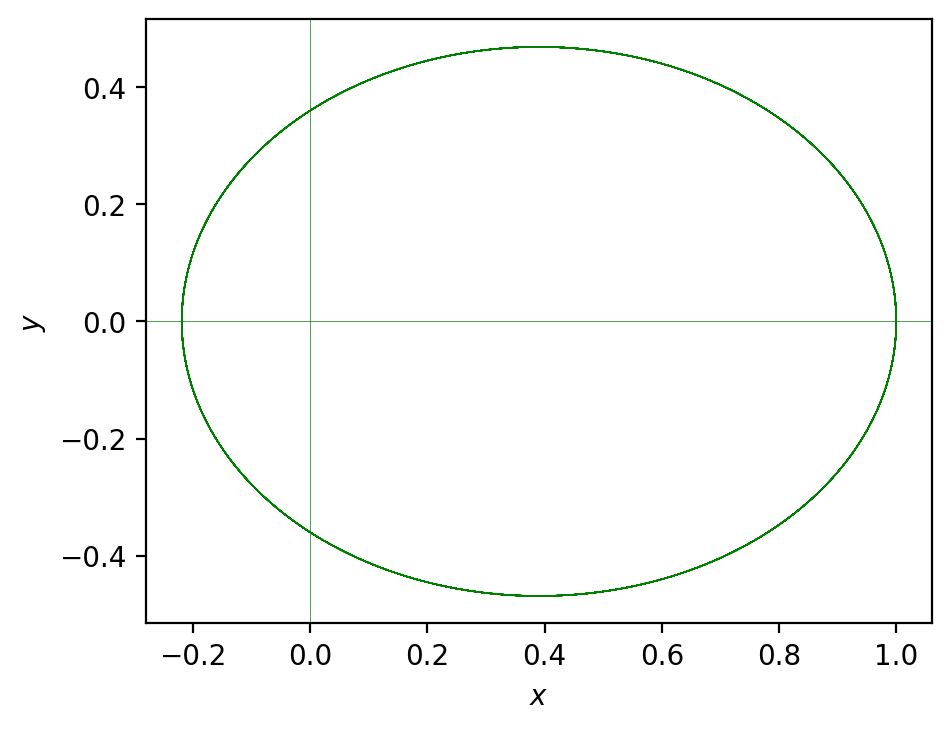

In [11]:
# Méthode prédicteur-correcteur-----------------------------------------------------------------------------------------
plt.axes().set_aspect(1)
#plt.subplot(313, aspect='equal')
plt.plot(Y[:,0],Y[:,1],'g-', lw=0.5)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.axhline(0, color='green', lw=0.25) # on trace l'axe des x
plt.axvline(0, color='green', lw=0.25) # on trace l'axe des y

# Partie 2

In [12]:
%matplotlib ipympl

# Importations nécessaires
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from scipy.integrate import solve_ivp

In [13]:
#----------------Paramètres physiques de la simulation----------------------

# Masses des corps simulés
m1 = 1.0
m2 = m1
m3 = m1

"""
Ordres des éléments dans le vecteur (x_ini) de conditions initiales :
    0,1 : Position initiale du premier corps
    2,3 : Vitesse intiale du premier corps
    4,5 : Position initiale du deuxième corps
    6,7 : Vitesse intiale du deuxième corps
    8,9 : Position initiale du troisième corps
    10,11 : Vitesse intiale du troisième corps
"""
# TEST >>> x_ini = [1., -0.25059444, 0.4591677, 0.42584043, -1., 0.25059444, 0.4591677, 0.42584043, 0., 0., -0.91833539, -0.85168086]

# Conditions initiales
x_ini = [-0.20, 0., 0.5, 0.30,
         0.20, 0., 0.5, -0.30,
         0., 1.7, -1.0, 0.]

#---------------------Paramètres d'affichage de la simulation---------------------------------

#Demi largeur du domaine de la figure et longueur de la trace affichée
L = 2.0
longueur_trace = 200

In [14]:
# Force radiale entre les corps massifs
def force_gravite(r):
    return 1.0/(r**3)

# Vecteur vitesse-position à 12 éléments
def DX(t, x):
    
    # Coordonnées relatives entre les corps 
    #Corps 1
    x12 = x[4]-x[0]
    y12 = x[5]-x[1]
    
    # Corps 2
    x13 = x[8]-x[0]
    y13 = x[9]-x[1]
    
    # Corps 3
    x23 = x[8]-x[4]
    y23 = x[9]-x[5]
    
    # Module des positions relatives
    R12 = np.sqrt(x12**2+y12**2) 
    R13 = np.sqrt(x13**2+y13**2)
    R23 = np.sqrt(x23**2+y23**2)
    
    # Calcul des forces entres les corps
    F12 = m1*m2*force_gravite(R12) 
    F13 = m1*m3*force_gravite(R13)
    F23 = m2*m3*force_gravite(R23)
    return [x[2], x[3], (F12*x12+F13*x13)/m1, (F12*y12+F13*y13)/m1, x[6], x[7], (-F12*x12+F23*x23)/m2, (-F12*y12+F23*y23)/m2, x[10], x[11], (-F13*x13-F23*x23)/m3, (-F13*y13-F23*y23)/m3]

In [17]:
%matplotlib ipympl

# initialisation de la figure
fig, ax = plt.subplots()

# les variables de la classe 'patch' permettent de dessiner les objets
corps1 = patches.Circle((0,0),0.08,facecolor='red', lw=1)
corps2 = patches.Circle((0,0),0.08,facecolor='green', lw=1)
corps3 = patches.Circle((0,0),0.08,facecolor='blue', lw=1)
ax.add_patch(corps1)
ax.add_patch(corps2)
ax.add_patch(corps3)
line1, = ax.plot([], [], color='red', lw=0.5)  #  pointeurs vers le tableau des segments
line2, = ax.plot([], [], color='green', lw=0.5)  #  pointeurs vers le tableau des segments
line3, = ax.plot([], [], color='blue', lw=0.5)  #  pointeurs vers le tableau des segments
t_text = plt.text(0,0.9*L,'', horizontalalignment='center')

# cadrage initial
ax.set_aspect(1)
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)
ax.grid()
xdata1, ydata1 = [], []
xdata2, ydata2 = [], []
xdata3, ydata3 = [], []

dt = 1./30

# mise à jour des données à chaque image de l'animation
def run(t):

    global x_ini, xdata1, ydata1, xdata2, ydata2, xdata3, ydata3, L

    sol = solve_ivp(DX, (0, dt), x_ini, rtol=1e-6, atol=1e-9)
    print(sol)
    X = np.transpose(sol.y)
        
    x_ini = X[-1]
    corps1.center = x_ini[0], x_ini[1] # mise à jour de la position du corps 1 (rouge)
    corps2.center = x_ini[4], x_ini[5] # mise à jour de la position du corps 2 (vert)
    corps3.center = x_ini[8], x_ini[9] # mise à jour de la position du corps 3 (bleu)
    num_elem = len(X)
    rmax = np.max(np.abs(x_ini[[0,1,4,5,8,9]]))
    if rmax > 1.2*L and rmax < 30: # redéfinition du cadre si un objet s'échappe
        L *= 1.5
        ax.set_xlim(-L, L)
        ax.set_ylim(-L, L)
    elif rmax < L/6  and rmax > 0.5: # redéfinition du cadre si un objet s'échappe
        L /= 2
        ax.set_xlim(-L, L)
        ax.set_ylim(-L, L)


    if len(xdata1) > longueur_trace*num_elem:  # on efface le début de la série
        xdata1 = np.delete(xdata1, range(num_elem))
        ydata1 = np.delete(ydata1, range(num_elem))
    xdata1 = np.append(xdata1, X[:, 0])  # on ajoute à la fin de la série
    ydata1 = np.append(ydata1, X[:, 1])
    line1.set_data(xdata1, ydata1)
    
    if len(xdata2) > longueur_trace*num_elem:  # on efface le début de la série
        xdata2 = np.delete(xdata2, range(num_elem))
        ydata2 = np.delete(ydata2, range(num_elem))
    xdata2 = np.append(xdata2, X[:, 4])  # on ajoute à la fin de la série
    ydata2 = np.append(ydata2, X[:, 5])
    line2.set_data(xdata2, ydata2)
        
    if len(xdata3) > longueur_trace*num_elem:  # on efface le début de la série
        xdata3 = np.delete(xdata3, range(num_elem))
        ydata3 = np.delete(ydata3, range(num_elem))
    xdata3 = np.append(xdata3, X[:, 8])  # on ajoute à la fin de la série
    ydata3 = np.append(ydata3, X[:, 9])
    line3.set_data(xdata3, ydata3)
    
    plt.title('t = {0:4.1f}'.format(t))

T = 80  # temps de simulation
ani = animation.FuncAnimation(fig, run, frames=np.arange(0, T, dt), interval = 10, repeat=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …